In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

import pandas
import numpy
import matplotlib.pyplot as plt
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.python.keras.models import Model
from keras.utils import plot_model

df = pandas.read_csv('largecategoricaltestdata.csv', sep=';')
    
categoricalConversions = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(categoricalConversions)
y = df['y']

df = pandas.get_dummies(df,df.columns[df.dtypes == 'object'])
X = df.drop('y', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

input_layer = Input(shape=(X.shape[1],)) ;'63'
dl1 = Dense(32, activation='relu')(input_layer)
output_layer = Dense(1)(dl1)

model = Model(inputs = input_layer, outputs=output_layer)
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

History = model.fit(X_train, y_train, epochs=75, validation_split=0.2)
loss, accuracy = model.evaluate(X_test,  y_test) 
print('\n'+'Accuracy:', accuracy)
print('Loss:', loss)

c:\Python310\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1516: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
824/824 [==============================] - 2s 1ms/step - loss: 1.5543 - accuracy: 0.8198 - val_loss: 1.2775 - val_accuracy: 0.8892
Epoch 2/100
824/824 [==============================] - 1s 1ms/step - loss: 1.3557 - accuracy: 0.8585 - val_loss: 1.3291 - val_accuracy: 0.8733
Epoch 3/100
824/824 [==============================] - 1s 1ms/step - loss: 1.3067 - accuracy: 0.8588 - val_loss: 1.2331 - val_accuracy: 0.8598
Epoch 4/100
824/824 [==============================] - 1s 1ms/step - loss: 1.1744 - accuracy: 0.8710 - val_loss: 1.0852 - val_accuracy: 0.8785
Epoch 5/100
824/824 [==============================] - 1s 1ms/step - loss: 1.0624 - accuracy: 0.8803 - val_loss: 1.0175 - val_accuracy: 0.8807
Epoch 6/100
824/824 [==============================] - 1s 1ms/step - loss: 0.9962 - accuracy: 0.8857 - val_loss: 1.0922 - val_accuracy: 0.8803
Epoch 7/100
824/824 [==============================] - 1s 1ms/step - loss: 0.8980 - accuracy: 0.8923 - val_loss: 0.8556 - val_accuracy: 0.8901

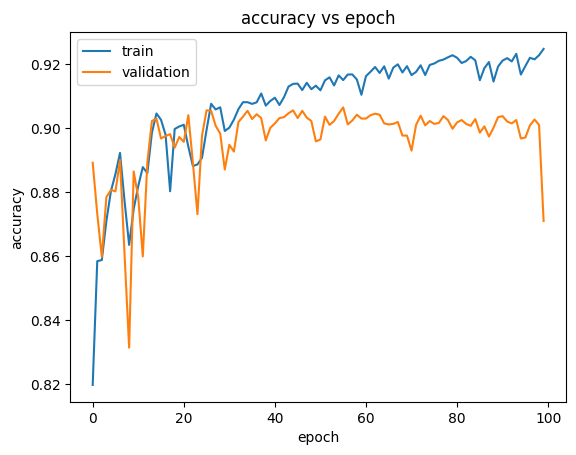

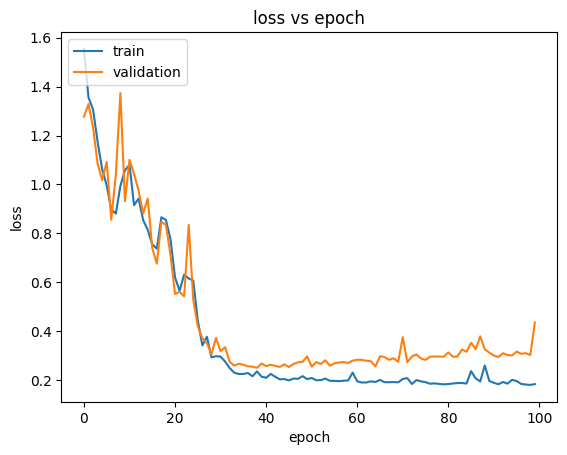

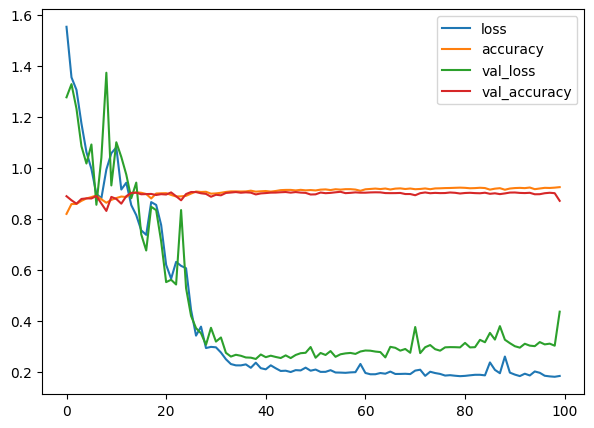

'print(X.shape)\nprint(X.shape[1])'

In [2]:
'predicted = model.predict(X_test)'
'print(History.history.keys())'

# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# combined
pandas.DataFrame(History.history).plot(figsize=(7,5))
plt.show()